# **Covid en italia**

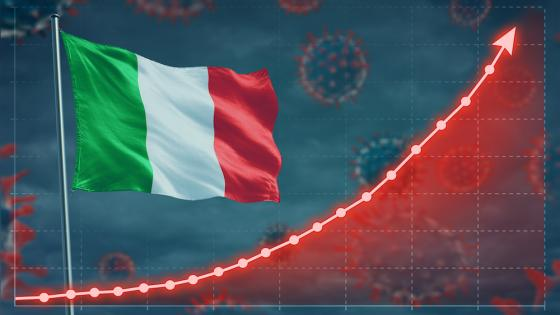

## Trabajo de Alexis Alvarez | Documento: 38691776
<a id="index"></a>

### Tabla de contenido:
- [Intro](#section_intro)
- [EDA](#section_descriptive)
- [Limpieza de Datos](#section_limpieza)
- [Medidas de dispersión](#covarianza)
- [Graficos](#section_grafico)
- [Mapa de Correlacion (estandarizacion/normalizacion)](#corr)
- [Regresion lineal](#lineal)
- [Dataframe 2 (merge)](#merge)
- [Concluciones](#concluciones)

# Intro<a id="section_intro"></a>:
Trabajo de Alexis Alvarez, grupo 11. Solamente yo de intengrante.
Voy a realizar un analisis sobre el Covid-19 en Italia e intentar utilizar algunas cosas vistas en clase y ademas, responder a algunas preguntas y concluciones.

Tambien voy a utilizar algunos metodos encontrados en los colab trabajados en clase

## **Analisis exploratorio de los datos**
<a id="section_descriptive"></a> 
### Primero importamos librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

esta funcion de abajo nos permite utilizar una url para agarrar datos, en este caso github

In [2]:
from urllib.request import urlretrieve

In [3]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(italy_covid_url, 'italy-covid-daywise.csv')

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x1a4a7848d50>)

### Ahora el archivo "italy-covid-daywise.csv" queda guardado en nuestra carpeta

In [4]:
covid_df = pd.read_csv('italy-covid-daywise.csv')

In [5]:
covid_df.isnull().sum()

date            0
new_cases       0
new_deaths      0
new_tests     113
dtype: int64

In [6]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


Dataframe:

- date: La fecha del dia registrado
- new_cases: Casos nuevos de covid-19 registrados
- new_deaths: Casos nuevos de muertes registradas por covid
- new_tests: Pruebas de covid realizadas en la fecha


Por ahora mi data tiene solo variables cuantitativas, mas adelante fusionare mi tabla con otra

In [7]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


Tenemos para visualizar informacion importante, columnas, filas, tipos de datos

<a id="section_limpieza"></a>
# Limpieza de datos


In [8]:
type(covid_df)

pandas.core.frame.DataFrame

type para ver si efectivamente es formato dataframe

In [9]:
covid_df.dtypes

date           object
new_cases     float64
new_deaths    float64
new_tests     float64
dtype: object

Dtype comprueba los tipos de dato dentro del dataframe

In [10]:
covid_df[['new_cases', 'new_deaths', 'new_tests']].mean()

new_cases      1094.818548
new_deaths      143.133065
new_tests     31699.674074
dtype: float64

la media fue de:
- 1096 para **nuevos casos**
- 143 para **fallecidos**
- 31699 para **nuevas pruebas**

# Manejo de datos ausentes o erroneos

## ¿Existe algún sesgo en los datos recogidos? ¿Hay errores en la codificación de los datos?


#### Utilizando describe para ver un paneo general de los numeros, encontramos que hay en nuevos casos un numero que no corresponde (seria imposible que hayan negativos nuevos casos y muertes)

In [11]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


Detetados valores negativos son errores ya que es imposible que haya un conteo negativo

#### Lo Arreglamos


In [12]:
covid_df.sort_values('new_cases').head(5)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN


Sort_values es utilizado para ordenar los datos 'new_cases' de menor a mayor

In [13]:
np.std(covid_df['new_deaths']) #deviacion estandar

226.6472017652724

In [14]:
covid_df['new_deaths'].mean() #media

143.13306451612902

In [15]:
covid_df.sort_values('new_deaths').head(5) #new_deaths ordenado de menor a mayor

,date,new_cases,new_deaths,new_tests
177,2020-06-25,577.0,-31.0,29421.0
30,2020-01-30,0.0,0.0,NaN
31,2020-01-31,3.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN


Vamos a asumir que fue un data entry error. Podemos utilizar uno de los siguientes metodos para lidiar con valores faltantes:
***
- Reemplazarlo con 0
- Reemplazarlo con el promedio de las columnas adyacentes
- Reemplazarlo con el promedio de la columna entera
- Descartar la fila entera

In [16]:
covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] + covid_df.at[173, 'new_cases'])/2

la posicion 172 (el valor incorrecto) pasa a ser la mitad de su anterior y su proximo sumados

In [17]:
covid_df[171:174] #mostramos solo esas posiciones en la tabla

,date,new_cases,new_deaths,new_tests
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,297.5,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0


Para muertes voy a asumir que el menor valor seria 0

In [18]:
covid_df.at[177, 'new_deaths'] = 0.0

In [19]:
covid_df[177:178]

,date,new_cases,new_deaths,new_tests
177,2020-06-25,577.0,0.0,29421.0


In [20]:
covid_df['new_tests'] = covid_df['new_tests'].fillna(0) #metodo fill n.a

In [21]:
covid_df.describe() #esta funcion describe todos los valores comunes calculados

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,248.000000
mean,1096.614919,143.258065,17255.870968
std,1553.322957,227.017821,17986.924137
min,0.000000,0.000000,0.000000
25%,127.500000,3.000000,0.000000
50%,342.000000,17.000000,17758.000000
75%,1371.750000,175.250000,30019.500000
max,6557.000000,971.000000,95273.000000


#### listo
***

Creamos nuevas columnas a base de los resultados totales, que nos puede proporcionar informacion valiosa a la vista

In [22]:
total_cases = covid_df.new_cases.sum() #sum para la suma de todos los valores
total_deaths = covid_df.new_deaths.sum()
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()

In [23]:
covid_df['total_cases'] = covid_df.new_cases.cumsum() #cumsum va sumando el total al proximo valor
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()
covid_df['total_tests'] = covid_df.new_tests.cumsum() + initial_tests

In [24]:
covid_df

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,0.0,0.0,0.0,935310.0
1,2020-01-01,0.0,0.0,0.0,0.0,0.0,935310.0
2,2020-01-02,0.0,0.0,0.0,0.0,0.0,935310.0
3,2020-01-03,0.0,0.0,0.0,0.0,0.0,935310.0
4,2020-01-04,0.0,0.0,0.0,0.0,0.0,935310.0
...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,267298.5,35504.0,5117788.0
244,2020-08-31,1365.0,4.0,42583.0,268663.5,35508.0,5160371.0
245,2020-09-01,996.0,6.0,54395.0,269659.5,35514.0,5214766.0
246,2020-09-02,975.0,8.0,0.0,270634.5,35522.0,5214766.0


Ahora tenemos los valores para cada dia y ademas la sumatoria total para cada dia individual

***

# Medidas de dispercion

A continuacion ejemplificare algunas medidasd de dispercion

<a id="covarianza"></a>
## Covarianza para muertes / casos

In [25]:
np.cov([covid_df['new_deaths'], covid_df['total_deaths']])

array([[ 5.15370910e+04, -3.18361685e+05],
       [-3.18361685e+05,  2.39397439e+08]])

In [26]:
np.cov([covid_df['new_cases'], covid_df['total_cases']])

array([[ 2.41281221e+06, -9.30843832e+06],
       [-9.30843832e+06,  1.16989474e+10]])

<a id="correlacion"></a>
## Correlacion para muertes / casos

In [27]:
np.corrcoef([covid_df['new_deaths'], covid_df['total_deaths']])

array([[ 1.        , -0.09063608],
       [-0.09063608,  1.        ]])

In [28]:
np.corrcoef([covid_df['new_cases'], covid_df['total_cases']])

array([[ 1.        , -0.05540407],
       [-0.05540407,  1.        ]])

## Desviacion standar

In [29]:
std = covid_df['total_deaths'].std()
print('La Standard deviation es: ', std)

La Standard deviation es:  15472.473605111934


## Coeficiente de Variabilidad

In [30]:
CoefVariab = (std/covid_df['total_deaths'].mean())*100
print('El coeficiente de variabilidad es de: ', round(CoefVariab,2),'%')

El coeficiente de variabilidad es de:  76.49 %


## Coeficiciente de variacion

In [31]:
import scipy
scipy.stats.variation(covid_df['total_deaths'])

0.7633558140651867

## Rango interquartil

In [32]:
scipy.stats.iqr(covid_df['total_deaths'])

34819.25

## Error Estandar

In [33]:
scipy.stats.sem(covid_df['total_deaths'])

982.5030564281554

***

### Podemos convertir cada año/mes/dia en su propia columna


In [34]:
covid_df.dtypes

date             object
new_cases       float64
new_deaths      float64
new_tests       float64
total_cases     float64
total_deaths    float64
total_tests     float64
dtype: object

Transformamos la columna 'date' de **objeto** a **datetime**

In [35]:
covid_df['date'] = pd.to_datetime(covid_df.date)

In [36]:
covid_df.date

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [37]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [38]:
covid_df.head(5)

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,0.0,0.0,0.0,935310.0,2019,12,31,1
1,2020-01-01,0.0,0.0,0.0,0.0,0.0,935310.0,2020,1,1,2
2,2020-01-02,0.0,0.0,0.0,0.0,0.0,935310.0,2020,1,2,3
3,2020-01-03,0.0,0.0,0.0,0.0,0.0,935310.0,2020,1,3,4
4,2020-01-04,0.0,0.0,0.0,0.0,0.0,935310.0,2020,1,4,5


### Podemos filtrar por mes de esta manera

In [39]:
covid_df.set_index('date', inplace=True)

In [40]:
covid_abril = covid_df[covid_df.month == 4]

In [41]:
covid_abril.head(5)

,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,year,month,day,weekday
date,,,,,,,,,,
2020-04-01,4053.0,839.0,0.0,105792.0,12430.0,935310.0,2020,4,1,2
2020-04-02,4782.0,727.0,0.0,110574.0,13157.0,935310.0,2020,4,2,3
2020-04-03,4668.0,760.0,0.0,115242.0,13917.0,935310.0,2020,4,3,4
2020-04-04,4585.0,764.0,0.0,119827.0,14681.0,935310.0,2020,4,4,5
2020-04-05,4805.0,681.0,0.0,124632.0,15362.0,935310.0,2020,4,5,6


## ¿Cuales son los valores totales para el mes de abril? ¿Cual es la media de muertes en el mes de abril?
<a id="section_grafico"></a>

In [42]:
metricas_abril = covid_abril[['new_cases', 'new_deaths', 'new_tests']]

In [43]:
metricas_abril.sum()

new_cases     101852.0
new_deaths     16091.0
new_tests     419591.0
dtype: float64

In [44]:
metricas_abril['new_deaths'].mean()

536.3666666666667

La media de fallecidos fue de 536 en el mes de abril

### casos en abril

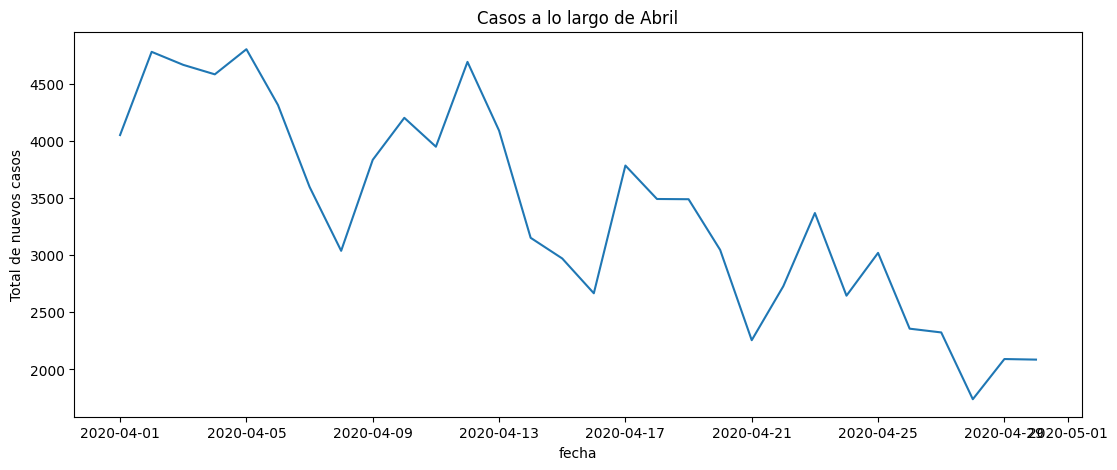

In [45]:
plt.figure(figsize=(13,5))
plt.plot(metricas_abril['new_cases'])
plt.title('Casos a lo largo de Abril')
plt.ylabel('Total de nuevos casos')
plt.xlabel('fecha');

Bastante variabilidad con subidas y bajas a medida del tiempo pero descendiendo

### Muertes en abril

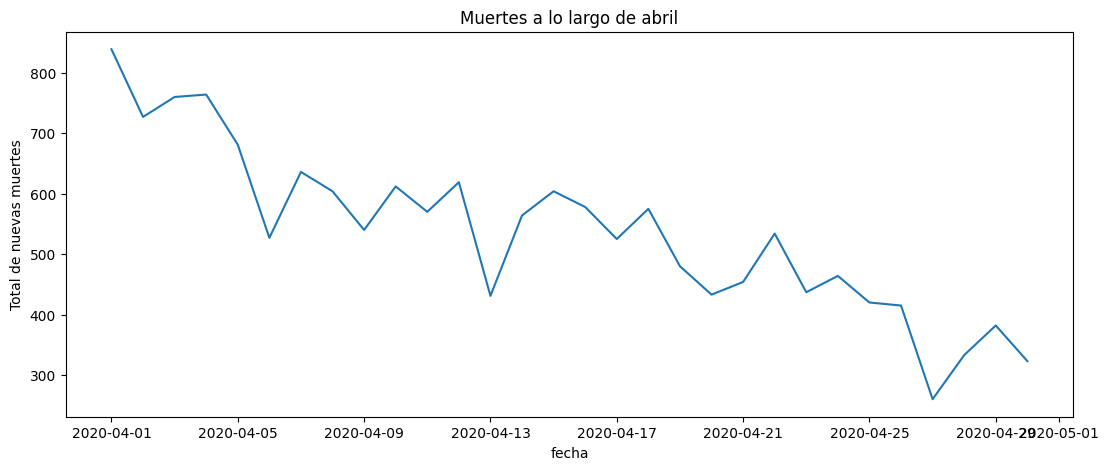

In [46]:
plt.figure(figsize=(13,5))
plt.plot(metricas_abril['new_deaths'])
plt.title("Muertes a lo largo de abril")
plt.ylabel('Total de nuevas muertes')
plt.xlabel("fecha");

De igual manera decendiendo al paso del tiempo

### Pruebas en abril

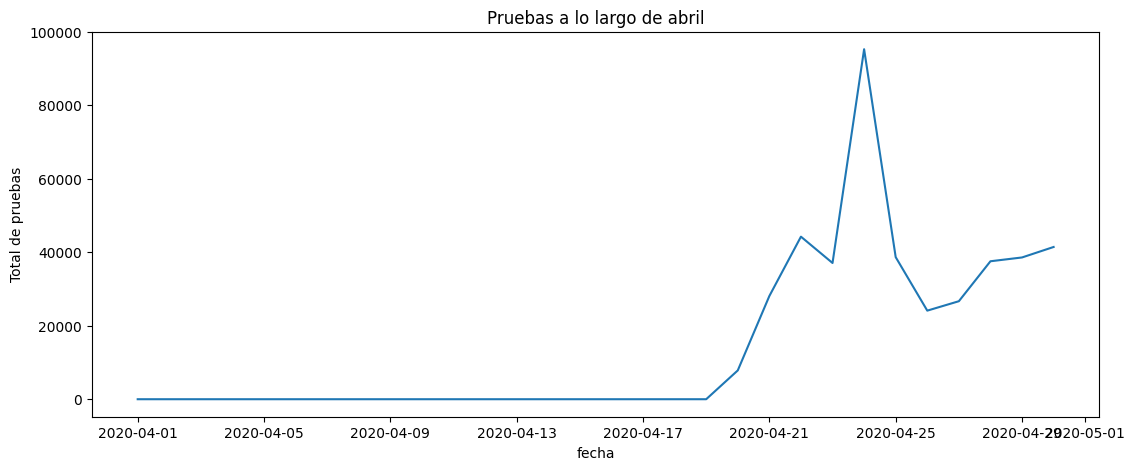

In [47]:
plt.figure(figsize=(13,5))
plt.plot(metricas_abril['new_tests'])
plt.title('Pruebas a lo largo de abril')
plt.ylabel('Total de pruebas')
plt.xlabel("fecha");

Se inicia sin pruebas algunas (0) a partir del dia 18 en adelante del mes de abril empiezan las pruebas de covid

### De esta manera podemos tener todas las filas que fueron del mes "abril" por ejemplo

***

## ¿Como es la distribucion total para muertes y casos?

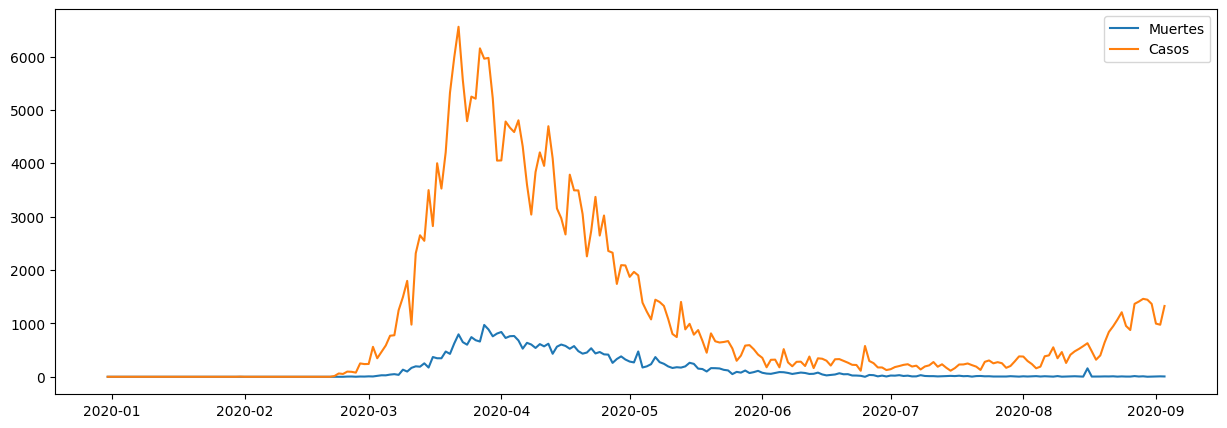

In [48]:
plt.figure(figsize=(15,5))
plt.plot(covid_df.new_deaths)
plt.plot(covid_df.new_cases)
plt.legend(['Muertes','Casos']);

## ¿Cuantos casos totales hubo registrados en nuestro dataset?

In [49]:
total_cases = covid_df.new_cases.sum()
print("hubo", total_cases, "casos totales")

hubo 271960.5 casos totales


# ¿Como son los valores totales con respecto a cada mes?

In [50]:
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()

### Relacion de valores con respecto al mes

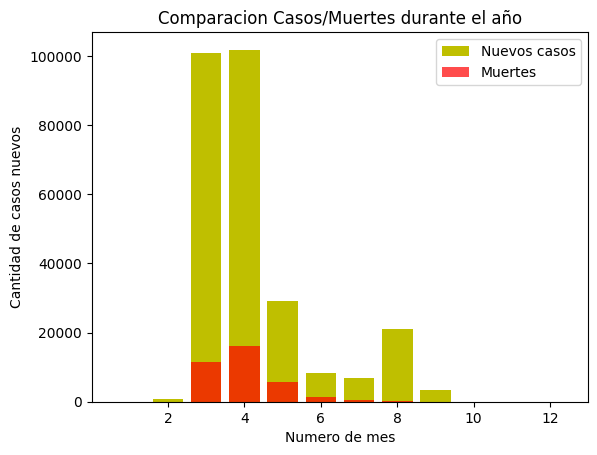

In [51]:
plt.bar(covid_month_df.index, covid_month_df.new_cases, color='y');
plt.bar(covid_month_df.index, covid_month_df.new_deaths, color='r', alpha=0.7);
plt.title("Comparacion Casos/Muertes durante el año")
plt.ylabel('Cantidad de casos nuevos');
plt.xlabel('Numero de mes');
plt.legend(['Nuevos casos', 'Muertes']);

## ¿Cuantas pruebas fueros realizadas durante cada mes?

In [52]:
Pruebas_totales = covid_month_df.new_tests

In [53]:
Pruebas_totales.sum()

4279456.0

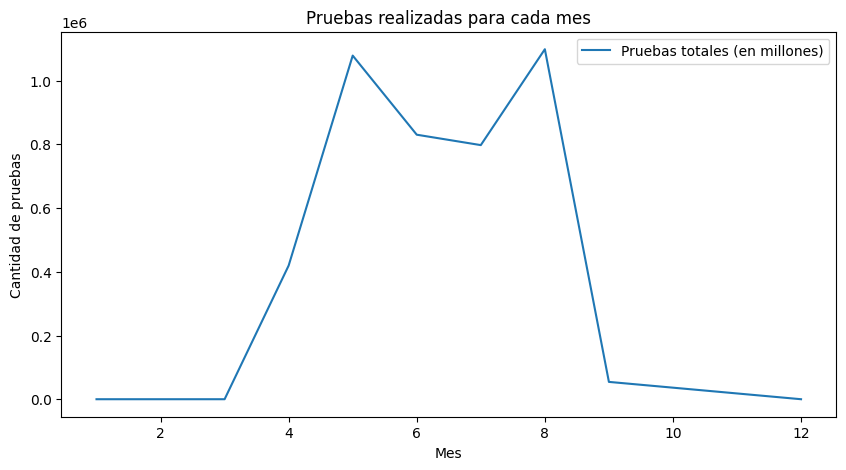

In [54]:
plt.figure(figsize=(10,5))
plt.plot(Pruebas_totales);
plt.title("Pruebas realizadas para cada mes")
plt.xlabel('Mes')
plt.ylabel('Cantidad de pruebas')
plt.legend(['Pruebas totales (en millones)']);

## Mapa de correlacion (Normalizacion)
<a id="corr"></a>

In [55]:
from sklearn.preprocessing import StandardScaler
escala = StandardScaler()
escalado = escala.fit_transform(covid_df[['new_cases',
       'new_deaths', 'new_tests',
       'total_deaths', 'total_tests', 'total_cases']])
escalado.T

array([[-0.70740765, -0.70740765, -0.70740765, ..., -0.06490497,
        -0.07845172,  0.14797242],
       [-0.63231938, -0.63231938, -0.63231938, ..., -0.60583629,
        -0.59700859, -0.60583629],
       [-0.96129647, -0.96129647, -0.96129647, ...,  2.06896039,
        -0.96129647, -0.96129647],
       [-1.31000509, -1.31000509, -1.31000509, ...,  0.9899386 ,
         0.9904567 ,  0.99084527],
       [-0.87049461, -0.87049461, -0.87049461, ...,  2.21605564,
         2.21605564,  2.21605564],
       [-1.35328674, -1.35328674, -1.35328674, ...,  1.14487006,
         1.15390257,  1.16618679]])

In [56]:
matriz_cov = np.cov(escalado.T)
matriz_cov

array([[ 1.00404858,  0.94044473, -0.18839191, -0.11437431, -0.32139589,
        -0.05562838],
       [ 0.94044473,  1.00404858, -0.18218394, -0.09100302, -0.41546645,
        -0.03842987],
       [-0.18839191, -0.18218394,  1.00404858,  0.80715672,  0.66186581,
         0.80336681],
       [-0.11437431, -0.09100302,  0.80715672,  1.00404858,  0.8154806 ,
         1.00177842],
       [-0.32139589, -0.41546645,  0.66186581,  0.8154806 ,  1.00404858,
         0.80905304],
       [-0.05562838, -0.03842987,  0.80336681,  1.00177842,  0.80905304,
         1.00404858]])

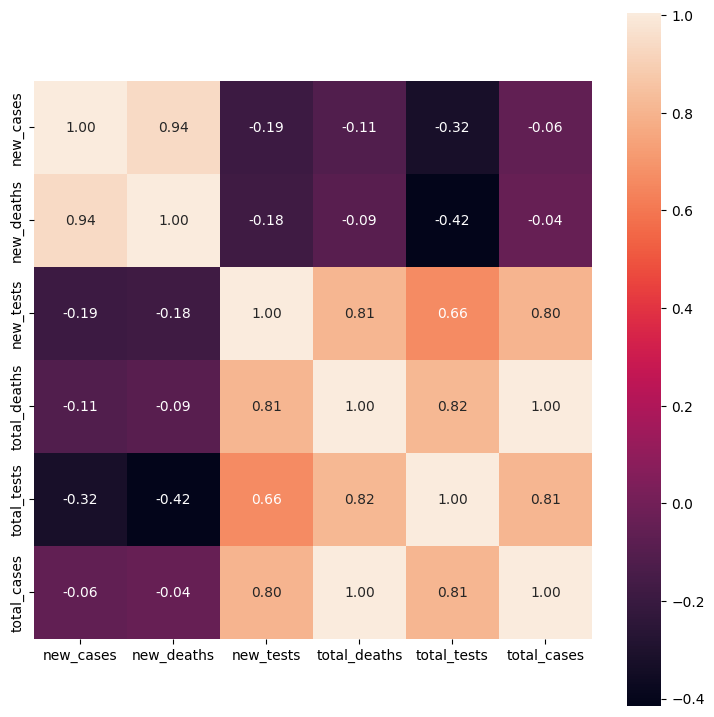

In [57]:
plt.figure(figsize=(9,9))
mapa_calor = sns.heatmap(matriz_cov, fmt='.2f', square=True, cbar=True, annot=True , xticklabels= ['new_cases',
       'new_deaths', 'new_tests',
       'total_deaths', 'total_tests', 'total_cases'], yticklabels=['new_cases',
       'new_deaths', 'new_tests',
       'total_deaths', 'total_tests', 'total_cases'] )

Segun el matriz claramente queda visto que las muertes totales son perfectamente correlativos a los casos totales

## Regresion lineal
<a id="lineal"></a>

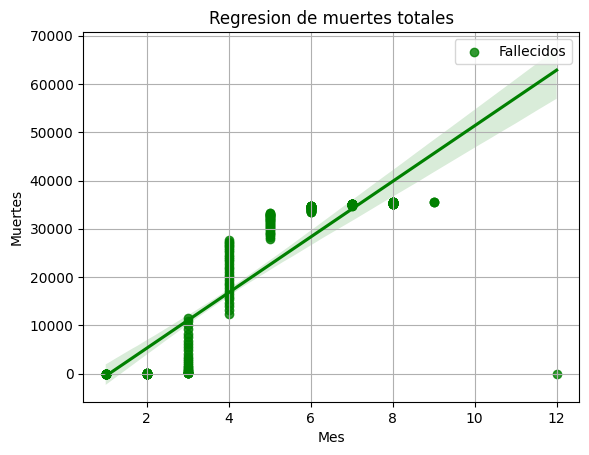

In [58]:
sns.regplot(data = covid_df, x= 'month', y= 'total_deaths', fit_reg=True, color='g',label= 'Fallecidos',marker='o')
plt.xlabel('Mes')
plt.ylabel('Muertes')
plt.title('Regresion de muertes totales')
plt.grid()
plt.legend()
plt.show()

Intento de aplicacion de regresion lineal

### ¿Cual fue el mes con mas muertes? / ¿Cual fue el mes con mas casos?

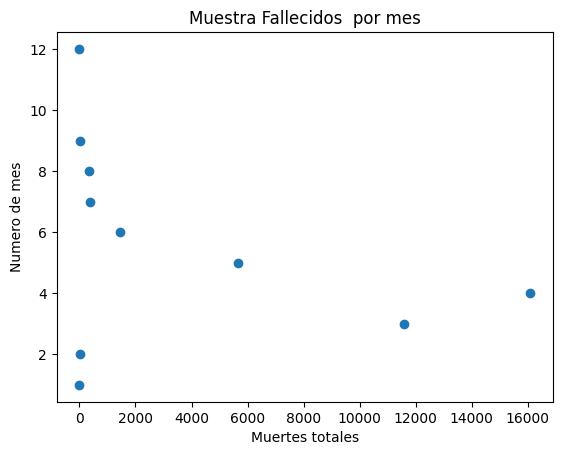

In [59]:
plt.scatter(covid_month_df['new_deaths'], covid_month_df.index);
plt.title('Muestra Fallecidos  por mes')
plt.xlabel('Muertes totales')
plt.ylabel('Numero de mes');

En el mes de **abril** fueron registrados los mayores conteos de fallecidos en Italia

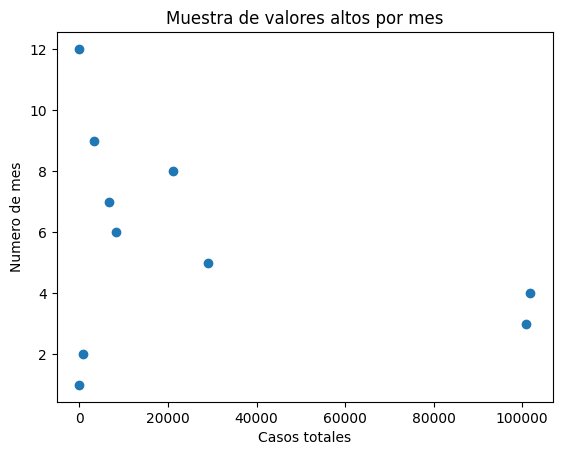

In [60]:
plt.scatter(covid_month_df['new_cases'], covid_month_df.index);
plt.title('Muestra de valores altos por mes')
plt.xlabel('Casos totales')
plt.ylabel('Numero de mes');

De manera similar **Abril** fue el mes de mas casos registrados en Italia, seguido muy cerca del mes de **Marzo**

# Combinando tablas
<a id="merge"></a>

### Podemos combinar los dataframes usando merge

In [61]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x1a4aac42b90>)

In [62]:
poblacion_df = pd.read_csv('locations.csv')

In [63]:
poblacion_df # nueva tabla

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


- location: El pais en efecto
- continent: Continente
- population: Cantidad de poblacion total
- life expentancy: El valor calculado de la esperanza de vida
- hospital_beds_per_thousand: Cuantas camas de hospital hay cada 1000 habitantes
- gdp_per_capita: basicamente el Pib (El Producto Interno Bruto)

In [64]:
poblacion_df[poblacion_df.location == "Italy"] ## seleciono solamente para italia

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


Selecciono solamente Italia ya que es el analizado en en anterior dataset

In [65]:
covid_df['location'] = "Italy"

In [66]:
covid_df

,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,year,month,day,weekday,location
date,,,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,0.0,935310.0,2019,12,31,1,Italy
2020-01-01,0.0,0.0,0.0,0.0,0.0,935310.0,2020,1,1,2,Italy
2020-01-02,0.0,0.0,0.0,0.0,0.0,935310.0,2020,1,2,3,Italy
2020-01-03,0.0,0.0,0.0,0.0,0.0,935310.0,2020,1,3,4,Italy
2020-01-04,0.0,0.0,0.0,0.0,0.0,935310.0,2020,1,4,5,Italy
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,1.0,53541.0,267298.5,35504.0,5117788.0,2020,8,30,6,Italy
2020-08-31,1365.0,4.0,42583.0,268663.5,35508.0,5160371.0,2020,8,31,0,Italy
2020-09-01,996.0,6.0,54395.0,269659.5,35514.0,5214766.0,2020,9,1,1,Italy


In [67]:
merged_df = covid_df.merge(poblacion_df, on="location") ## uso merge para fusinar las tablas con localidad 
## italia

In [68]:
merged_df

,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,year,month,day,weekday,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,0.0,0.0,0.0,0.0,0.0,935310.0,2019,12,31,1,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,0.0,0.0,0.0,0.0,0.0,935310.0,2020,1,1,2,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,0.0,0.0,0.0,0.0,0.0,935310.0,2020,1,2,3,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,0.0,0.0,0.0,0.0,0.0,935310.0,2020,1,3,4,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,0.0,0.0,0.0,0.0,0.0,935310.0,2020,1,4,5,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,1444.0,1.0,53541.0,267298.5,35504.0,5117788.0,2020,8,30,6,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,1365.0,4.0,42583.0,268663.5,35508.0,5160371.0,2020,8,31,0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,996.0,6.0,54395.0,269659.5,35514.0,5214766.0,2020,9,1,1,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,975.0,8.0,0.0,270634.5,35522.0,5214766.0,2020,9,2,2,Italy,Europe,60461828.0,83.51,3.18,35220.084


### ¿Cuantos casos por millon de poblacion hay?

In [69]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

In [70]:
merged_df[['cases_per_million','deaths_per_million','tests_per_million']].describe()

,cases_per_million,deaths_per_million,tests_per_million
count,248.000000,248.000000,248.000000
mean,2416.042578,334.560062,35431.244828
std,1788.924950,255.904827,22977.951270
min,0.000000,0.000000,15469.429737
25%,25.615335,0.554069,15469.429737
50%,3446.438966,470.925226,23872.706925
75%,3993.631321,576.442214,55495.568212
max,4498.052887,587.610418,86248.897403


# Resumen y concluciones
<a id="concluciones"></a>

- El dataset analizado fue sobre la aparicion del covid-19 en Italia en 2020
- Se completaron valores faltantes y se realizaron pequeñas concluciones sobre cada una (ver [indice](#index) para mas info)
- Como valores fueron mayormente registrados en el año 2020, no existe la posibilidad de hacer un analisis mas alla de la fecha tomada
- Aparentemente entre el mes de Marzo y Abril es donde existieron la mayor cantidad de valores registrados para Italia
- 4279456 pruebas de covid-19 realizadas, 271960 Casos de covid detectados mediante las pruebas y 35528 fallecidos a causa de la enfermedad
- Los primeros dos meses y los ultimos dos meses del año registran muy pocos o ningun caso de covid